In [ ]:
pip install numpy matplotlib astropy

In [ ]:
# Step 2: Import Required library
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
import plotly.express as px
from PIL import Image

In [ ]:
# Step 3: Read fits image file
file=fits.open('/content/frame-r-005071-3-0347.fits.bz2')
# Step 4: Extract file information
file.info()

Filename: /content/frame-r-005071-3-0347.fits.bz2
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [ ]:
# Step 5: Extract header information
file[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4609823091.17 / 1st row - Number of seconds since Nov 17 1858  
RA      =            167.20433 / 1st row - Right ascension of telescope boresigh
DEC     =            28.798722 / 1st row - Declination of telescope boresight (d
SPA     =              81.210  / 1st row - Camera col position angle wrt north (
IPA     =             154.95

In [ ]:
# Step 6: Extract 2D Image data
image_data = file[0].data
image_data.shape

(1489, 2048)

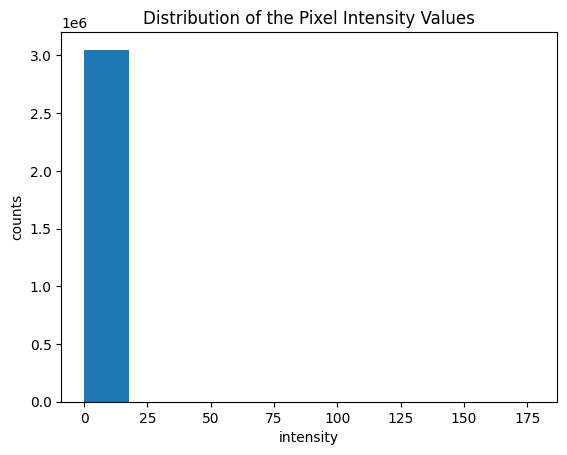

In [ ]:
# Step 7: Visualizing Distribution of Pixel Intensity Value
plt.figure()
plt.hist(np.ravel(image_data))  # As the data is in 2D format convert it into 1D data format.
plt.ylabel('counts')
plt.xlabel('intensity')
plt.title('Distribution of the Pixel Intensity Values')
plt.show()



/tmp/ipython-input-9-751029010.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(image_data))


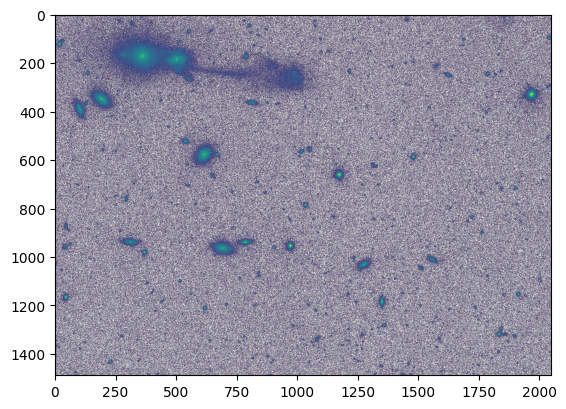

In [ ]:
# Step 8: Visualizing FITS image in PIXEL space
plt.figure()
plt.imshow(np.log10(image_data))
plt.show()

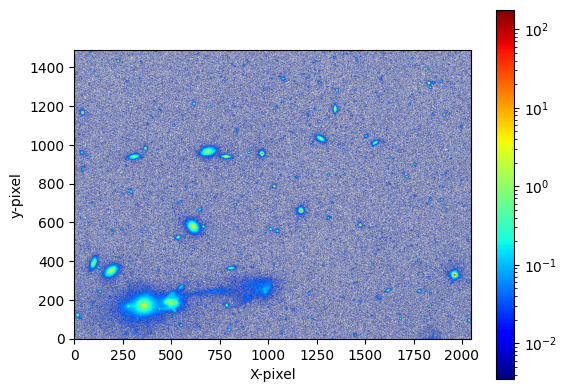

In [ ]:
plt.figure()
plt.imshow(image_data, norm=LogNorm(), origin='lower', cmap='jet')
plt.colorbar()
plt.xlabel('X-pixel')
plt.ylabel('y-pixel')
plt.show()



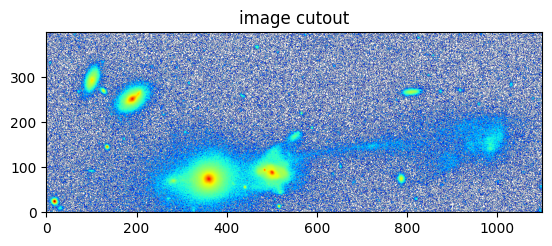

In [ ]:
# Step 8: Create 2D Image cutout
cut_2d = image_data[100:500, 0:1100]  # x=0:1100, y=100:500
plt.figure()
plt.imshow(cut_2d, norm=LogNorm(), origin='lower', cmap='jet')
plt.title('image cutout')
plt.show()

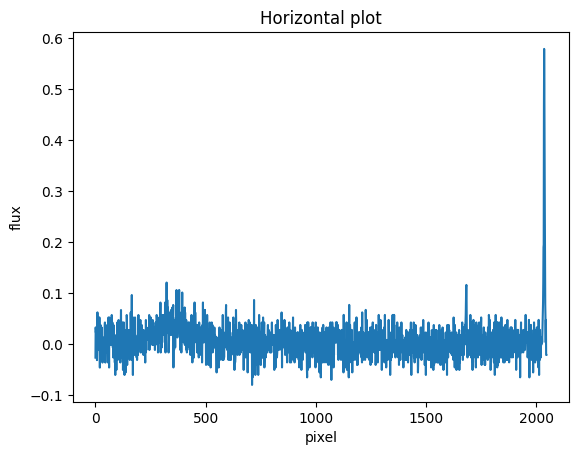

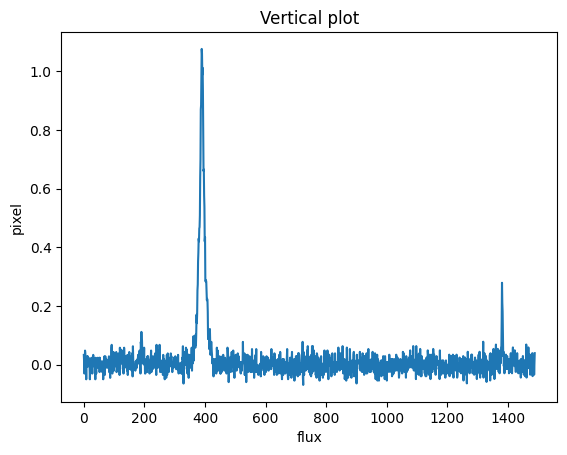

In [ ]:
# Step 9: 1D Intensity Profile (Horizontal and Vertical)
plt.figure()
plt.plot(image_data[100, :]) # Horizontal
plt.xlabel('pixel')
plt.ylabel('flux')
plt.title('Horizontal plot')
plt.show()

plt.figure()
plt.plot(image_data[:, 100]) # Vertical
plt.xlabel('flux')
plt.ylabel('pixel')
plt.title('Vertical plot')
plt.show()


/usr/local/lib/python3.11/dist-packages/astropy/wcs/wcs.py:537: FITSFixedWarning: RADECSYS= 'ICRS ' / International Celestial Ref. System 
the RADECSYS keyword is deprecated, use RADESYSa.
  wcsprm = _wcs.Wcsprm(
/usr/local/lib/python3.11/dist-packages/astropy/wcs/wcs.py:805: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 53354.000000 from DATE-OBS'.
  warnings.warn(


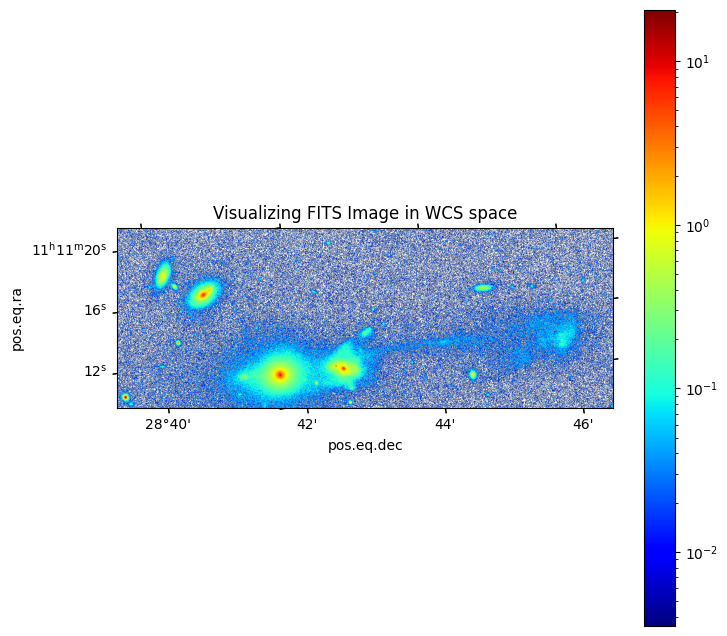

In [ ]:
# Step 10: Visualizing FITS Image in WCS space
from astropy.wcs import WCS
wcs = WCS(file[0].header)  # (x,y) to (RA, DEC)
plt.figure(figsize=(8, 8))
plt.subplot(projection=wcs)
plt.title('Visualizing FITS Image in WCS space')
plt.imshow(cut_2d, norm=LogNorm(), origin='lower', cmap='jet')
plt.colorbar()
plt.show()